In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
filename_list = ['eminem.csv', 'katyperry.csv', 'lmfao.csv', 'psy.csv', 'shakira.csv']
youtube_df = pd.DataFrame(columns=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
for name in filename_list:
    df = pd.read_csv(name, header=None, sep=',', names=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
    youtube_df = youtube_df.append(df[1:], ignore_index=True)

X = youtube_df.CONTENT[1:] # not including the headers..
y = youtube_df.CLASS[1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)  

print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)

    

General Accuracy: 0.912065439673
[[205  33]
 [ 10 241]]


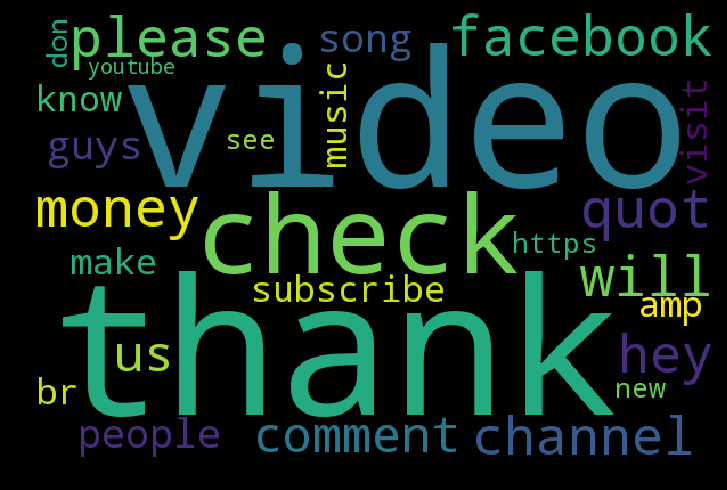

In [3]:
spam_token_count = nb.feature_count_[1, :] 
X_train_tokens = vect.get_feature_names()
tokens = pd.DataFrame({'token':X_train_tokens, 'spam':spam_token_count})
tokens['spam'] = tokens.spam + 1
tokens['spam'] = tokens.spam / nb.class_count_[1]

spam_words = tokens.sort_values('spam', ascending=False)
spam_words = list(spam_words.token)[:70]
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()